In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-housingcsv/USA_Housing.csv


# Purpose : Prediction with Regression Models

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import seaborn as sns

**Data set used for models: USA_Housing.csv**

In [68]:
mydata = pd.read_csv('/kaggle/input/usa-housingcsv/USA_Housing.csv',sep=',')
mydata.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,NaN,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


# Data cleaning

**Let's see the value of Nans in the dataset**

In [69]:
mydata.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             6
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         5
dtype: int64

Only **"Avg. Area House Age"** and "Address" have Nan value.

We only manage miss values of the features affecting the target variable

In [70]:
ave = mydata['Avg. Area House Age'].astype("float").mean()
mydata['Avg. Area House Age'].replace(np.nan,ave,inplace=True)

We separate the target variable and variables dependent on the target, which is possible in the following ways

In [71]:
'''
X = mydata.loc[:,'Avg. Area Income':'Area Population']
y = mydata.loc[:,'Price']

or

X = mydata[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms'
             ,'Avg. Area Number of Bedrooms','Area Population']]
y = mydata['Price']

'''
X = mydata.iloc[:,0:5]
y = mydata.iloc[:,5]

**We divide the data into train and test**

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

# We create a Linear_Regression model and fit it

In [73]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

**We examine the predictions of the model visually with a scatter diagram**

<Axes: xlabel='Price'>

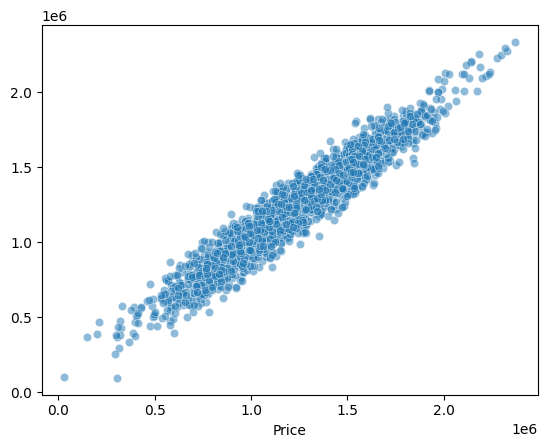

In [74]:
lmpredictions=lm.predict(X_test)
sns.scatterplot(x=y_test, y=lmpredictions, alpha=0.5)


In [75]:
print('MAE:',metrics.mean_absolute_error(y_test,lmpredictions))
print('MSE:',metrics.mean_squared_error(y_test,lmpredictions))
print('RMsE:',np.sqrt(metrics.mean_squared_error(y_test,lmpredictions)))

MAE: 81143.34802405108
MSE: 10086647407.924015
RMsE: 100432.30261187888


# We create a Ridge model and fit it

In [79]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

<Axes: xlabel='Price'>

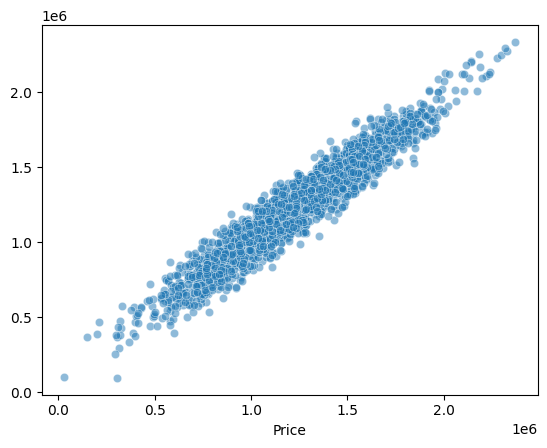

In [84]:
ridgepredictions=ridge.predict(X_test)
sns.scatterplot(x=y_test, y=ridgepredictions, alpha=0.5)

In [82]:
print('MAE:',metrics.mean_absolute_error(y_test,ridgepredictions))
print('MSE:',metrics.mean_squared_error(y_test,ridgepredictions))
print('RMsE:',np.sqrt(metrics.mean_squared_error(y_test,ridgepredictions)))

MAE: 81142.88778491282
MSE: 10086662041.275066
RMsE: 100432.37546366743


# We create a Lasso model and fit it

In [85]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0) 
lasso.fit(X_train, y_train)

Lasso()

<Axes: xlabel='Price'>

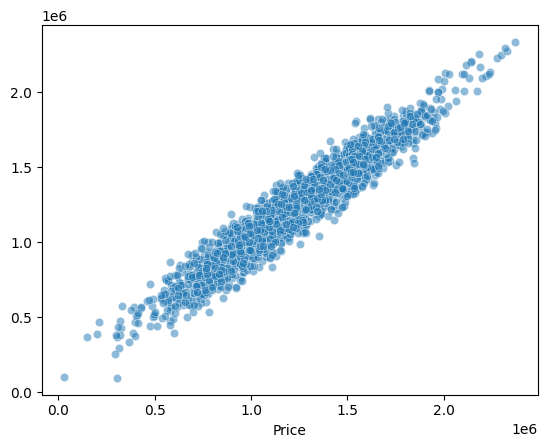

In [86]:
lassopredictions=lasso.predict(X_test)
sns.scatterplot(x=y_test, y=lassopredictions, alpha=0.5)

In [87]:
print('MAE:',metrics.mean_absolute_error(y_test,lassopredictions))
print('MSE:',metrics.mean_squared_error(y_test,lassopredictions))
print('RMsE:',np.sqrt(metrics.mean_squared_error(y_test,lassopredictions)))

MAE: 81143.30948374319
MSE: 10086644575.066875
RMsE: 100432.2885085612
